In [78]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

datos = pd.read_csv("train.csv")
df=pd.DataFrame(datos)

df_agrupado = df.groupby(["Pclass", "Sex"])["Survived"].sum()
df_agrupado

promedio = df["Age"].mean()

#remplazar string por enteros

df['Sex'].replace(['female','male'],[0,1],inplace=True)
df['Embarked'].replace(['Q','S','C'],[0,1,2])
df['Age'] = df['Age'].replace(np.nan, promedio)


df.Cabin.fillna('Desconocido',inplace=True)
df.Embarked.fillna(4,inplace=True)

In [67]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [58]:
correlacionion = df.set_index('PassengerId').corr()
correlacion

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1, 'Correlacion de variables')

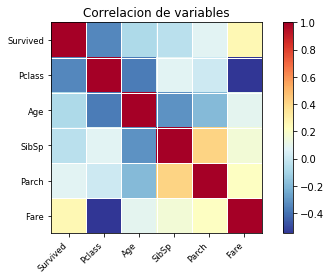

In [51]:
grafico_correlacion = sm.graphics.plot_corr(correlacion, xnames=list(correlacion.columns))
plt.title('Correlacion de variables')

In [74]:
df.head()
df.rename(columns={'Sex': 'Sexo'}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sexo,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Desconocido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Desconocido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Desconocido,S


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Sobreviventes por sexo')

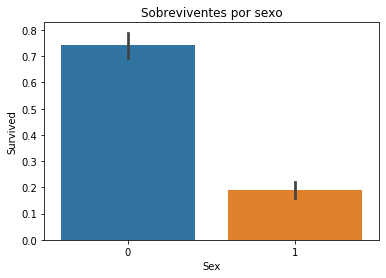

In [59]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Sobreviventes por sexo')

Text(0.5, 1.0, 'Porcentaje de Sobrevivientes por Clase')

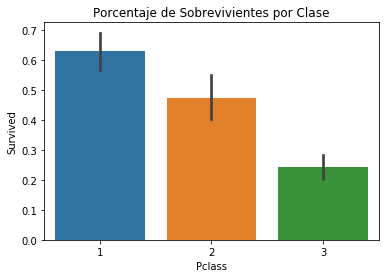

In [70]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Porcentaje de Sobrevivientes por Clase')

Text(0.5, 1.0, 'Sobrevivientes por Embarcacion')

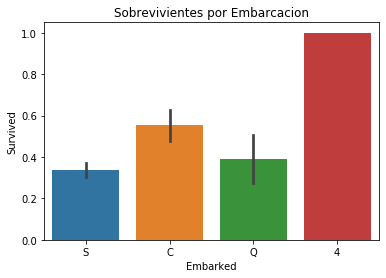

In [69]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Porcentaje de Sobrevivientes por Embarcacion')

Text(0.5, 1.0, 'Distribucion por edad')

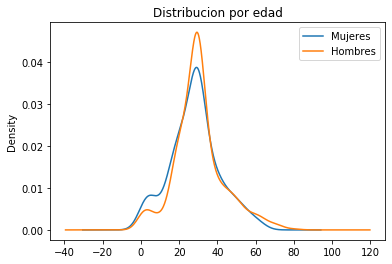

In [68]:
for t_sex in [0,1]:
    df.Age[df.Sex == t_sex].plot(kind="kde")
    
plt.legend({"Mujeres", "Hombres"})
plt.title('Distribucion por edad')

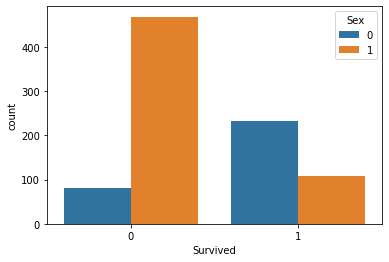

In [81]:
sns.countplot(x='Survived', hue='Sex', data=df)

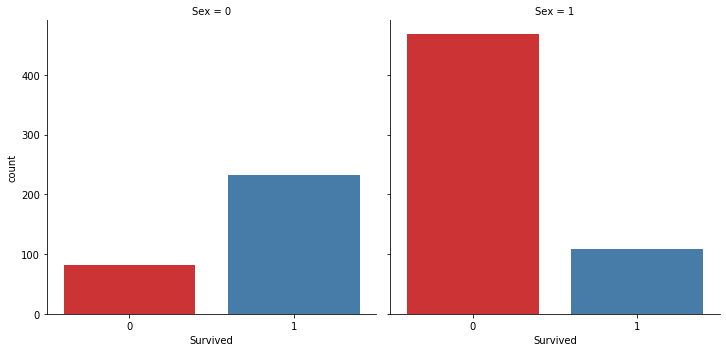

In [82]:
sns.catplot(x="Survived",col="Sex",palette="Set1", kind="count", data=df)